In [1]:
import sys
import numpy as np
sys.path.append("..")
from fireballpy import Fireball
from ase import Atoms
from ase.eos import EquationOfState
from ase.units import kJ

In [2]:
ETOT=[]
VOL=[]
for a in [5.00,5.20,5.30,5.40,5.50,5.60,5.80,6.00]:
    
    atoms = Atoms(symbols=['Si', 'Si'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       (    a/4,    a/4,    a/4)])  
    atoms.set_cell([(a/2, a/2, 0), (a/2, 0, a/2), (0, a/2, a/2)])

    atoms.calc = Fireball(charges='Mulliken-dipole-preserving', 
                      options='periodic',
                      kpts_monkhorst_pack_ind=[4,4,4]
                     )

    ETOT.append(atoms.get_potential_energy())
    VOL.append(atoms.get_volume())

In [3]:
eos = EquationOfState(VOL,ETOT)
v0, e0, B = eos.fit()

print(f'B = {B / kJ * 1.0e24:.2f} GPa')
print(f'V = {v0:.2f} \u00C5\u00B3')
a = (v0 * 4) ** (1/3)
print(f'a = {a:.2f} \u00C5')
print(f'E = {e0:.2f} eV')

B = 93.94 GPa
V = 40.93 Å³
a = 5.47 Å
E = -211.77 eV


<Axes: title={'center': 'sj: E: -211.770 eV, V: 40.933 Å$^3$, B: 93.939 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

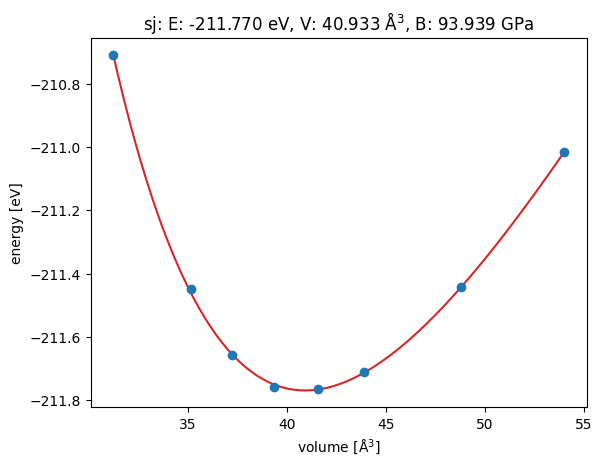

In [4]:
eos.plot()